## Bar

In [14]:
import pandas as pd
import sqlite3

### Connection to sqlite3

In [15]:
conn = sqlite3.connect("../ex00/data/checking-logs.sqlite")

In [16]:
pd.read_sql("PRAGMA table_info(checker);", conn)

,cid,name,type,notnull,dflt_value,pk
0,0,index,INTEGER,0,None,0
1,1,status,TEXT,0,None,0
2,2,success,INTEGER,0,None,0
3,3,timestamp,TIMESTAMP,0,None,0
4,4,numTrials,INTEGER,0,None,0
5,5,labname,TEXT,0,None,0
6,6,uid,TEXT,0,None,0


In [17]:
query_commits = """
SELECT timestamp, uid
FROM checker
WHERE uid LIKE 'user_%';
"""
df_timestamp = pd.read_sql_query(query_commits, conn)
df_timestamp

,timestamp,uid
0,2020-04-17 05:19:02.744528,user_4
1,2020-04-17 05:22:35.249331,user_4
2,2020-04-17 05:22:45.549397,user_4
3,2020-04-17 05:34:14.691200,user_4
4,2020-04-17 05:34:24.422370,user_4
...,...,...
3202,2020-05-21 20:19:06.872761,user_1
3203,2020-05-21 20:22:41.785725,user_1
3204,2020-05-21 20:22:41.877806,user_1
3205,2020-05-21 20:37:00.129678,user_1


### Set to date

In [18]:
df_timestamp['timestamp'] = pd.to_datetime(df_timestamp['timestamp'])
df_timestamp['hour'] = df_timestamp["timestamp"].dt.hour
df_timestamp

,timestamp,uid,hour
0,2020-04-17 05:19:02.744528,user_4,5
1,2020-04-17 05:22:35.249331,user_4,5
2,2020-04-17 05:22:45.549397,user_4,5
3,2020-04-17 05:34:14.691200,user_4,5
4,2020-04-17 05:34:24.422370,user_4,5
...,...,...,...
3202,2020-05-21 20:19:06.872761,user_1,20
3203,2020-05-21 20:22:41.785725,user_1,20
3204,2020-05-21 20:22:41.877806,user_1,20
3205,2020-05-21 20:37:00.129678,user_1,20


### Set daytime

In [19]:
bins = [0, 4, 10, 17, 24]
labels = ["night", "morning", "afternoon", "evening"]
df_timestamp["daytime"] = pd.cut(df_timestamp["hour"], bins=bins, labels=labels, right=False, include_lowest=True)
df_timestamp

,timestamp,uid,hour,daytime
0,2020-04-17 05:19:02.744528,user_4,5,morning
1,2020-04-17 05:22:35.249331,user_4,5,morning
2,2020-04-17 05:22:45.549397,user_4,5,morning
3,2020-04-17 05:34:14.691200,user_4,5,morning
4,2020-04-17 05:34:24.422370,user_4,5,morning
...,...,...,...,...
3202,2020-05-21 20:19:06.872761,user_1,20,evening
3203,2020-05-21 20:22:41.785725,user_1,20,evening
3204,2020-05-21 20:22:41.877806,user_1,20,evening
3205,2020-05-21 20:37:00.129678,user_1,20,evening


### Ready for graph

In [20]:
df_timestamp["date"] = df_timestamp["timestamp"].dt.date
df_group = df_timestamp.groupby(['date', 'daytime'], observed=True).size().reset_index(name='counts')
df_group

,date,daytime,counts
0,2020-04-17,morning,13
1,2020-04-17,afternoon,10
2,2020-04-18,morning,1
3,2020-04-18,afternoon,33
4,2020-04-18,evening,35
...,...,...,...
85,2020-05-20,afternoon,11
86,2020-05-20,evening,10
87,2020-05-21,morning,1
88,2020-05-21,afternoon,27


### Graph

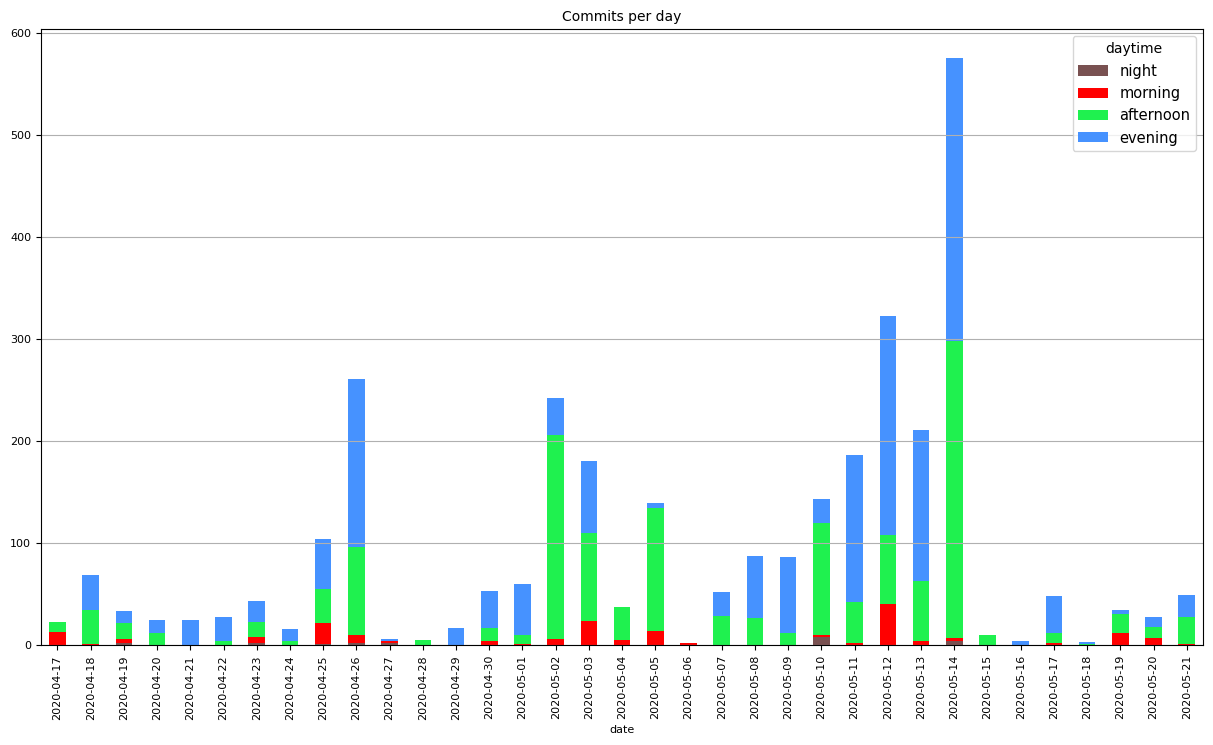

In [21]:
custom_colors = {'night': '#795151', 'morning': '#ff0000', 'afternoon': '#1ff14f', 'evening': '#4692ff'}

pivot_df = df_group.pivot(index='date', columns='daytime', values='counts')
color_list = [custom_colors[col] for col in pivot_df.columns]

plot = pivot_df.plot(kind='bar', stacked=True, figsize=(15, 8), fontsize=8, color=color_list)
plot.grid(axis='y')
plot.set_title("Commits per day", fontsize=10)
plot.set_xlabel("date", fontsize=8)
plot.legend(title="daytime", fontsize=10.5, title_fontsize=10);

### Connection closed

In [22]:
conn.close()

### Answer the question

In [23]:
# 1 Qaysi daytimelarda ko'p commit bo'lgan?
most_common = df_group.groupby("daytime", observed=True)["counts"].sum().sort_values(ascending=False)
most_common

daytime
evening      1611
afternoon    1391
morning       184
night          21
Name: counts, dtype: int64

In [24]:
# 2 Eng ko'p commit bo'lgan sana
most_commits_day = df_group.groupby("date")["counts"].sum().idxmax()
print(most_commits_day)

2020-05-14


In [25]:
# 3 evening, afternoon va shu kunlar ichida eng ko'p commit bo'lgan sana
day_data = df_group[df_group["date"] == most_commits_day].set_index("daytime")["counts"]
day_data

daytime
night          4
morning        3
afternoon    291
evening      277
Name: counts, dtype: int64

### 1. The most common daytimes are `evening(1611)` and `afternoon(1391)`
### 2. The most number of commits is `2020-05-14`
### 3. NO, the number of commits in the `afternoon(291)` is higher than evening(277)

In [26]:
# https://pandas.pydata.org/docs/user_guide/visualization.html
# https://python-graph-gallery.com/pandas/
# https://htmlcolorcodes.com/
# kereli saytla